In [10]:
using Plots

In [50]:
n = 200
x = range(0, stop=2π, length=n)

s₁ = sin.(1 * x)
s₂ = sin.(2 * x) * 2.5
s₃ = sin.(3 * x) * 5
s₄ = sin.(4 * x) * 7.5;

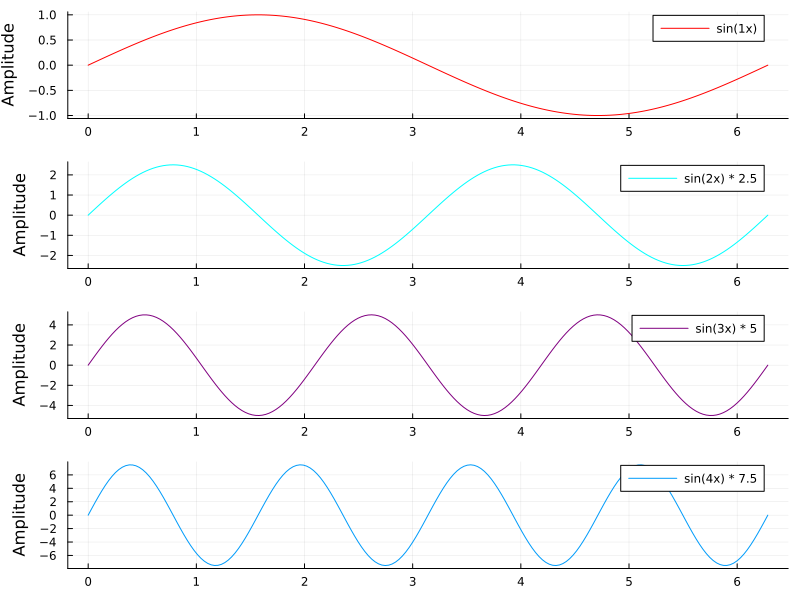

In [52]:
# Create a figure with subplots
fig₁ = plot(layout=(4, 1), size=(800, 600)
    # , legend=:topleft
    # , xlabel = "x"
    , ylabel = "Amplitude"
    # , title = "Multiple Sine Waves"
)

# Plotting
plot!(fig₁, x, s₄, subplot=4, label="sin(4x) * 7.5")
plot!(fig₁, x, s₃, subplot=3, label="sin(3x) * 5", linecolor="purple" )
plot!(fig₁, x, s₂, subplot=2, label="sin(2x) * 2.5", linecolor="cyan" )
plot!(fig₁, x, s₁, subplot=1, label="sin(1x)", linecolor="red" )

# Show the figure
display(fig₁)

In [53]:
f = exp.(-2 * (x .- (π + 1)).^2);

In [54]:
using LinearAlgebra

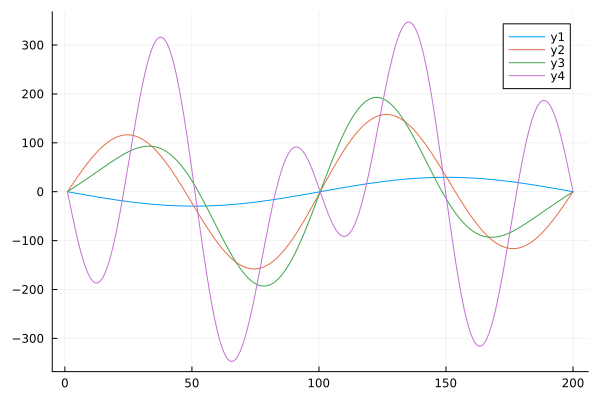

In [55]:
a₁ = f ⋅ s₁; f₁ = a₁ * s₁; 
a₂ = f ⋅ s₂; f₂ = a₁ * s₁ + a₂ * s₂;
a₃ = f ⋅ s₃; f₃ = a₁ * s₁ + a₂ * s₂ + a₃ * s₃;
a₄ = f ⋅ s₄; f₄ = a₁ * s₁ + a₂ * s₂ + a₃ * s₃ + a₄ * s₄;
plot(f₁)
plot!(f₂)
plot!(f₃)
plot!(f₄)

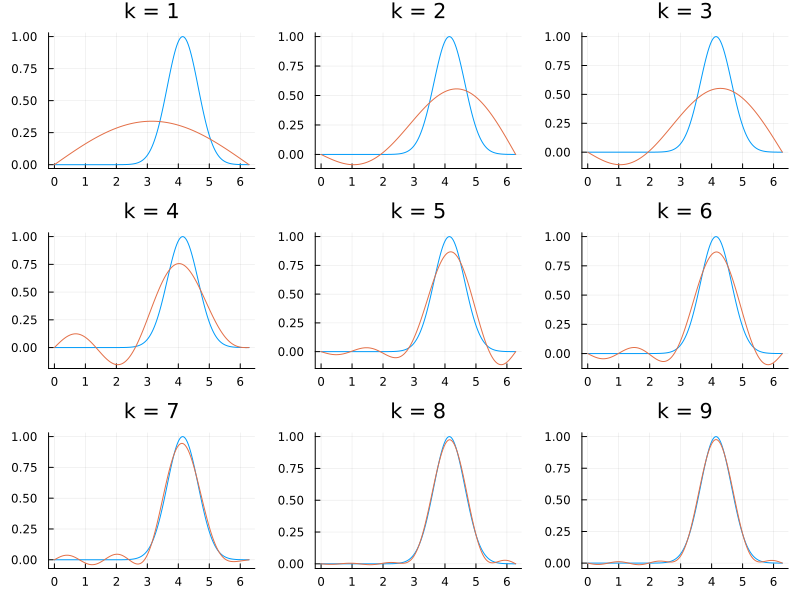

In [57]:
# Create a figure with subplots
fig = plot(layout=(3, 3), size=(800, 600))

approx = zeros(n)
for k in 1:9
    Sₙ = sin.(k * x / 2)
    Sₙ ./= √(Sₙ ⋅ Sₙ)  # Normalize s using broadcasting equivalent to Sₙ ./= norm(Sₙ)
    aₖ = f ⋅ Sₙ  # Dot product of two arrays (inner product)
    approx = approx .+ aₖ .* Sₙ  # Update the approximation using broadcasting
    plot!(fig, x, f, label="Original", subplot=k, title="k = $k")
    plot!(fig, x , approx
        , label="Approximation"
        , subplot=k
        , legend = :false
    )
end

# Show the figure
display(fig)


"Fourier coefficients" and "Fourier components" are related concepts in Fourier analysis, but they refer to slightly different aspects of the Fourier series or Fourier transform representation of a signal. Let's clarify each term:

1. **Fourier Coefficients:**
   - **Definition:** Fourier coefficients are the coefficients that appear in the expansion of a signal into a Fourier series.
   - **Notation:** In the context of a periodic signal, the Fourier series representation is often expressed as a sum of sine and cosine terms: $ s_k(t) = a_0 + \sum_{k=1}^{\infty} \left[ a_k \cos(2\pi kt/T) + b_k \sin(2\pi kt/T) \right] $, where $ a_k $ and $ b_k $ are the Fourier coefficients.
   - **Calculation:** Fourier coefficients are typically computed using integrals or other methods depending on the specific signal.

2. **Fourier Components:**
   - **Definition:** Fourier components refer to the individual sinusoidal functions (sines and cosines) that make up the Fourier series or Fourier transform of a signal.
   - **Notation:** In the Fourier series, each term $ a_k \cos(2\pi kt/T) + b_k \sin(2\pi kt/T) $ is a Fourier component. In the Fourier transform, the complex exponential functions $ e^{i2\pi ft} $ are the Fourier components.
   - **Frequency Representation:** Fourier components are characterized by their frequency, amplitude, and phase. Each component represents a sinusoidal oscillation at a specific frequency.

In summary, Fourier coefficients are the numerical coefficients associated with the terms in a Fourier series expansion, while Fourier components are the individual sinusoidal functions that contribute to the representation of a signal. The Fourier coefficients determine the amplitude and phase of the Fourier components in the series. Together, they provide a way to analyze and represent signals in the frequency domain.

#### The Fourier series representation would then look like this:

$$ s_k(t) = a_0 + \sum_{k=1}^{\infty} \left[ a_k \cos(2\pi kt/T) + b_k \sin(2\pi kt/T) \right] $$


In this example, the coefficients $ a_k $ and $ b_k $ are provided for $ k = 1, 2, 3 $, and the Fourier series approximation is plotted using the specified coefficients.

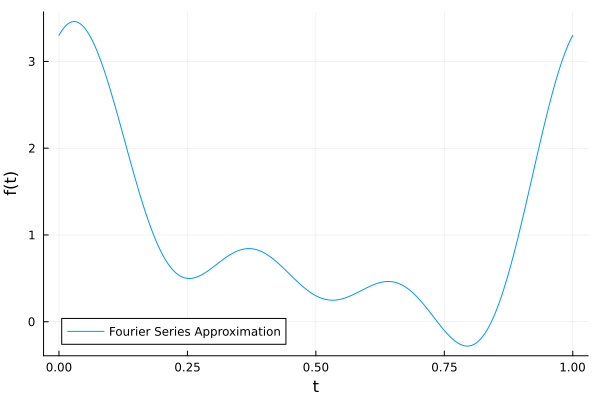

In [58]:
∑ = sum

# Example signal parameters
T = 1.0   # Period
a₀ = 1.0 # DC component amplitude
aₖ = [1.0, 0.8, 0.5]  # Cosine coefficients
bₖ = [0.5, 0.3, 0.2]  # Sine coefficients
k = 1:3  # Values of k for which coefficients are provided

# Time values
t = range(0, stop=T, length=1000)

# Fourier series approximation
sₖ(t) = a₀ + ∑(aₖ[i] * cos(2π * k[i] * t / T) + bₖ[i] * sin(2π * k[i] * t / T) for i in 1:length(k))

# Plot the signal and its Fourier series approximation
plot(t, sₖ.(t), label="Fourier Series Approximation", xlabel="t", ylabel="f(t)")


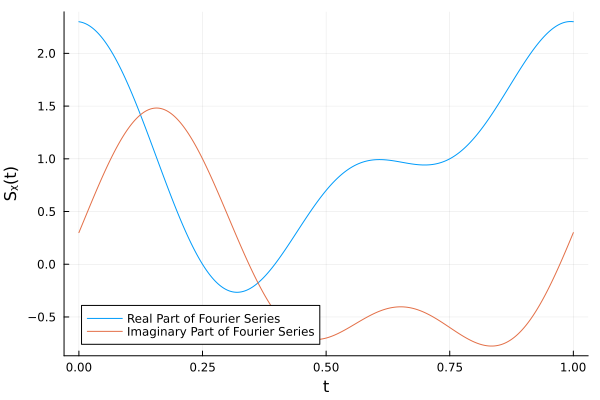

In [60]:
using Plots

# Example signal parameters
T = 1.0   # Period
cₖ = [1.0, 0.8 + 0.5im, 0.5 - 0.2im]  # Complex coefficients
kᵪ = 0:2  # Values of k for which coefficients are provided

# Time values
tᵪ = range(0, stop=T, length=1000)

# Fourier series approximation
Sᵪ(t) = sum(cₖ[i] * exp(im * 2π * kᵪ[i] * t / T) for i in 1:length(cₖ))

# Plot the signal and its Fourier series approximation
plot(tᵪ, real.(Sᵪ.(tᵪ)), label="Real Part of Fourier Series", xlabel="t", ylabel="Sᵪ(t)")
plot!(tᵪ, imag.(Sᵪ.(tᵪ)), label="Imaginary Part of Fourier Series")
